<a href="https://colab.research.google.com/github/keychi25/ElixirSchool/blob/master/mL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### csvの読み込み

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (1).csv


### pandasのインポート


In [0]:
import pandas as pd

### pandasでcsvの読み込み
read_csv('ファイル名', ' 区切るところ(一般的には, )')

In [3]:
bank_df = pd.read_csv('bank.csv', ',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


### 行数, 列数の確認
shape

In [4]:
print(bank_df.shape)

(7234, 17)


### データ型の確認
dtypes

In [5]:
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


## 欠損値
 - isnull() 
 欠損値が含まれているかどうか
 - any(axis=1)
 行方向に対する
 - any(axis=0)
 列方向に対する

In [6]:

print(bank_df.isnull().any(axis=1))
print(bank_df.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
7204    False
7205    False
7206     True
7207    False
7208    False
7209     True
7210    False
7211    False
7212    False
7213    False
7214    False
7215     True
7216    False
7217    False
7218    False
7219     True
7220    False
7221     True
7222    False
7223    False
7224    False
7225    False
7226    False
7227    False
7228    False
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housin

### 欠損値の数の確認
- sum(axis=1)
行方向の数
- sum(axis=0)
列方向の数

In [7]:
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      3
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      3
       ..
7204    0
7205    0
7206    1
7207    0
7208    0
7209    1
7210    0
7211    0
7212    0
7213    0
7214    0
7215    1
7216    0
7217    0
7218    0
7219    1
7220    0
7221    1
7222    0
7223    0
7224    0
7225    0
7226    0
7227    0
7228    0
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


###  統計量の計算

- 件数(count)
データの件数
- 合計値
データの値を足し合わせた値
- 平均値(mean)
合計値をデータの件数で割った値
- 標準偏差(std)
データのばらつきを表す値
- 最大値(max)
- 最小値(min)
- 中央値
- 最頻値
データの中で最も出現する値
- 四分位数
データを昇順に並べ,  4分割した区切り点

In [8]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


# データの可視化

### Matplotlibのインポート
データの可視化機能に使う

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

- plt.hist
ヒストグラムの表示
- xlabel, ylabl
X軸Y軸の設定
- .show
表示

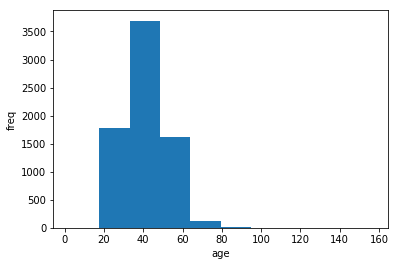

In [10]:
plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

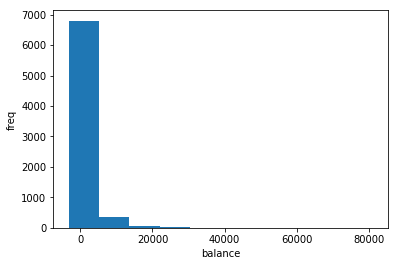

In [12]:
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

## ageとbalanceの散布図

- scatter
散布図の作成
- corr
相関係数を計算

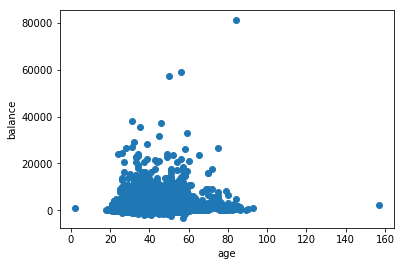

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [14]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age', 'balance']].corr()

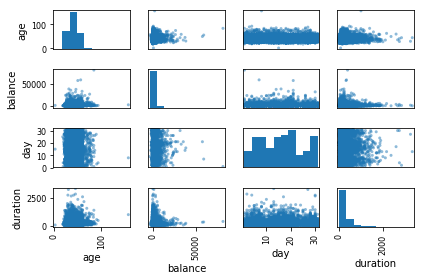

In [17]:
pd.plotting.scatter_matrix(bank_df[['age', 'balance', 'day', 'duration']])
plt.tight_layout()
plt.show()

### 円グラフの作成

jobの値ごとの比率を計算する
- value_count
値の出現数(job出現数)  
引数
- ascending=Falseで降順にソート
- normalize=Trueで出現数が1になるように正規化

In [18]:
print(bank_df['job'].value_counts(ascending=False, normalize=True))

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64



値ラベルと値出現数(比率)をそれぞれjob_lavel, job_valsに格納

In [0]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

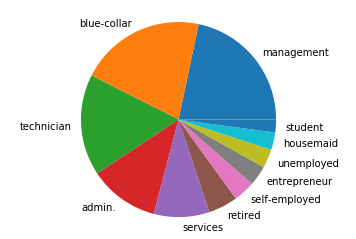

In [21]:
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

In [0]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

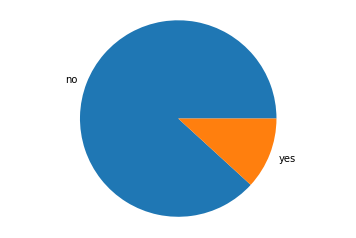

In [23]:
plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()